<a href="https://colab.research.google.com/github/jkwakyi/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food Sales Predictions**
* Jared Ahenkora-Kwakyi

## **Mount Drive, Import Libraries, Create DataFrame, OSEMN**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 4.3 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=6e4e2f6e34a047dd2d1cb7533958f07c81a76296ca42d950d0fe9ca2325fb4f1
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


In [3]:
# import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import filename after mounting drive
filename = '/content/drive/MyDrive/Data/sales_predictions.csv'

### **OHSEMN**

#### **Pre Scrub**

In [5]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


* 11 Colums=ns
* 8523 Rows

* Dtype
  * 4 float64
  * 1 int64
  * 7 objects

#### **Scrub**

##### **Missing Data Cleanup**

In [8]:
# Now that I have information on my Data, I am going to immediatly look into the missing data.


weight_missing = df['Item_Weight'].isna()
size_missing = df['Outlet_Size'].isna()

In [9]:
df[weight_missing].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [10]:
df['Item_Weight'].isna().sum()

1463

In [11]:
df[size_missing].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [12]:
df['Outlet_Size'].isna().sum()

2410

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800




*   I decided to use the interpolate method here because It would help clean up my data and it doesn't have much of an effect on the mean after comparing the two.
*   I am going to update my database with the item weight column completely filled out.



In [14]:
df = df.loc[0:'Item_Weight'].interpolate(method = 'linear')
df.describe(include = 'all').round(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.00,8523,8523.00,8523,8523.00,8523,8523.00,6113,8523,8523,8523.00
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.83,NaN,0.07,NaN,140.99,NaN,1997.83,NaN,NaN,NaN,2181.29
std,NaN,4.45,NaN,0.05,NaN,62.28,NaN,8.37,NaN,NaN,NaN,1706.50
min,NaN,4.56,NaN,0.00,NaN,31.29,NaN,1985.00,NaN,NaN,NaN,33.29
25%,NaN,9.00,NaN,0.03,NaN,93.83,NaN,1987.00,NaN,NaN,NaN,834.25
50%,NaN,12.60,NaN,0.05,NaN,143.01,NaN,1999.00,NaN,NaN,NaN,1794.33
75%,NaN,16.60,NaN,0.09,NaN,185.64,NaN,2004.00,NaN,NaN,NaN,3101.30


##### **Duplicate Data Cleanup**

In [15]:
df.duplicated().any()

False



*   Checked for duplicates
*   non were there



In [16]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
df.replace({'Low Fat': 'low fat',
            'LF': 'low fat', 
            'Regular': 'regular',
            'reg': 'regular'}, inplace = True)



* Some unneccesary options were present
* I made less options for the same description available. makes analysis easier later on.



In [18]:
df.replace({'High': 'Large'}, inplace = True)

In [19]:
df = df.loc[0: 'Outlet_Size'].fillna('Large')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




*   I decided to Fill in the missing Outlet sizes with Large sizes because the data showed me that the small outlets were fewest in number, followed by medium, each with around 2500. 
*   I made a judgement call and decided that the disproportionately small amount of Large buildings was due to a MNAR



#### **Explore**

##### **Correlations**

In [21]:
df.head().round(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,low fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,regular,0.00,Fruits and Vegetables,182.10,OUT010,1998,Large,Tier 3,Grocery Store,732.38
4,NCD19,8.93,low fat,0.00,Household,53.86,OUT013,1987,Large,Tier 3,Supermarket Type1,994.71


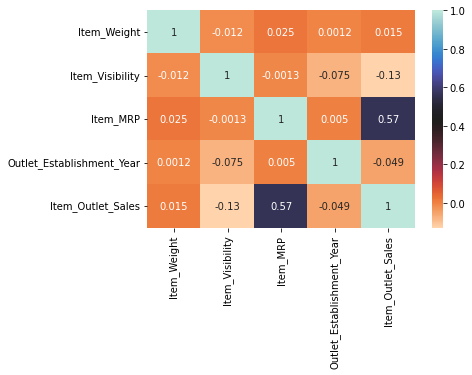

In [22]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'icefire_r')

In [23]:
outlet_id = df['Outlet_Identifier'].value_counts()

In [24]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().round(2)

Outlet_Identifier
OUT010     188340.17
OUT013    2142663.58
OUT017    2167465.29
OUT018    1851822.83
OUT019     179694.09
OUT027    3453926.05
OUT035    2268122.94
OUT045    2036725.48
OUT046    2118395.17
OUT049    2183969.81
Name: Item_Outlet_Sales, dtype: float64

In [25]:
total_sales_by_store = df.groupby(['Outlet_Identifier', 'Outlet_Size'])['Item_Outlet_Sales'].sum().round(2)

##### **Boxplt**
* in order to make the type of boxplot that i want, i will need to change the dtype of the Outlet_Identifier Column from an object to a float.
  * I will accomplish this by renaming all the items only the numerical representation of the ID and then making the column a float 64.
  * This will futher my correlation practices because I will be able to narrow data down to which stores were performing at an 'x' rate.

###### **Column Dtype Change**

In [26]:
df['Outlet_Identifier'].replace({'OUT010':'010', 'OUT013':'013','OUT017':'017',
                                 'OUT018':'018', 'OUT019':'019', 'OUT027':'027',
                                 'OUT035':'035', 'OUT045':'045', 'OUT046':'046',
                                 'OUT049':'049'}, inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,010,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [27]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].astype('float64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   float64
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


###### **Correlation Check**

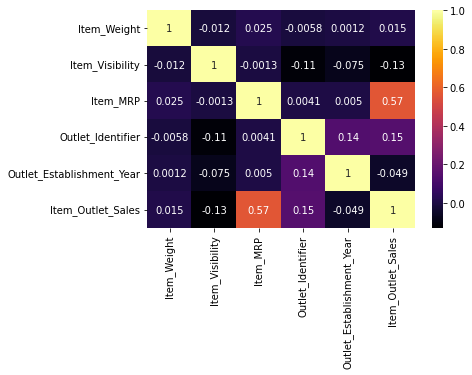

In [29]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'inferno')

###### **Boxplot**

In [30]:
df['Outlet_Identifier'].value_counts()

27.0    935
13.0    932
49.0    930
46.0    930
35.0    930
45.0    929
18.0    928
17.0    926
10.0    555
19.0    528
Name: Outlet_Identifier, dtype: int64

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,49.0,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,18.0,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,49.0,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10.0,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,13.0,1987,Large,Tier 3,Supermarket Type1,994.7052


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   float64
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


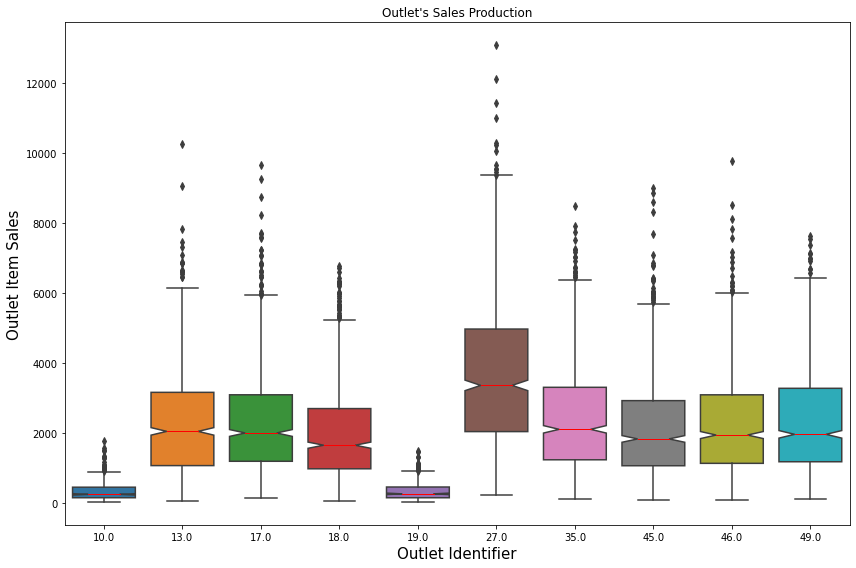

In [33]:
fig, axes = plt.subplots(figsize = (12, 8));
boxplots = sns.boxplot(data = df, y = 'Item_Outlet_Sales', x = 'Outlet_Identifier',
            notch = True,
            medianprops = dict(linestyle = '-', linewidth = 1, color = 'red'));
plt.xlabel('Outlet Identifier', fontsize = 15);
plt.ylabel('Outlet Item Sales', fontsize = 15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.title("Outlet's Sales Production");
plt.tight_layout()

##### **Histogram**

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,49.0,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,18.0,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,49.0,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10.0,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,13.0,1987,Large,Tier 3,Supermarket Type1,994.7052


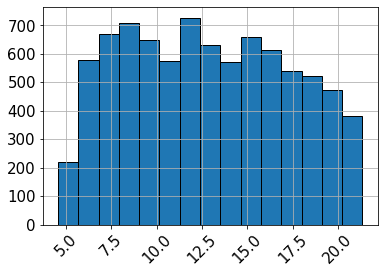

In [35]:
df['Item_Weight'].hist(bins = 15, edgecolor = 'black');
plt.xticks(rotation = 45, fontsize = 15);
plt.yticks(fontsize = 15);

##### **Scatterplot**

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,49.0,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,18.0,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,49.0,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10.0,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,13.0,1987,Large,Tier 3,Supermarket Type1,994.7052


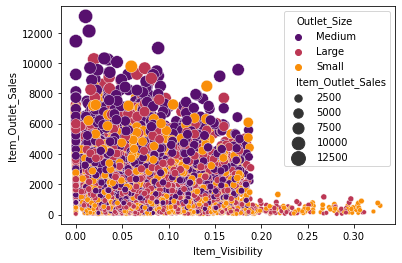

In [37]:
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales',
                hue = 'Outlet_Size', palette = 'inferno',
                size = 'Item_Outlet_Sales', sizes = (20,200))


In [38]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

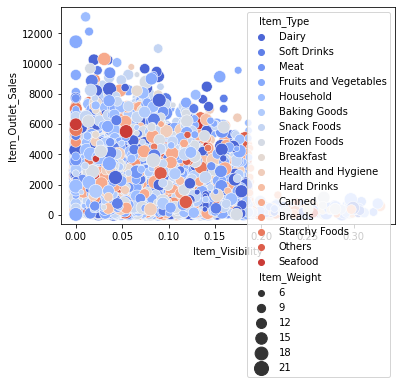

In [39]:
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales',
                hue = 'Item_Type', palette = 'coolwarm',
                size = 'Item_Weight', sizes = (20,200));

##### **SwarmPlot**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.1% of the points cannot be placed; y

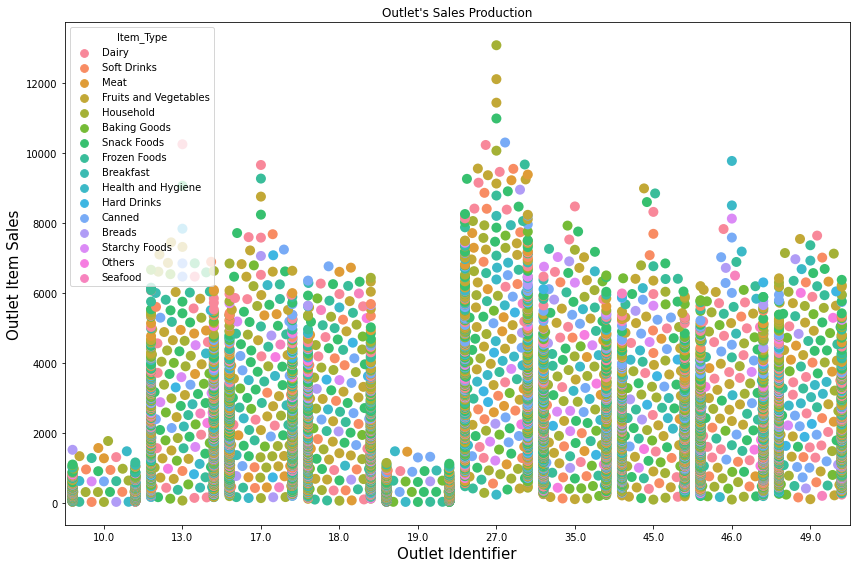

In [40]:
fig, axes = plt.subplots(figsize = (12, 8));
swarm = sns.swarmplot(data = df, y = 'Item_Outlet_Sales', x = 'Outlet_Identifier',
            hue = 'Item_Type', size = 10);
plt.xlabel('Outlet Identifier', fontsize = 15);
plt.ylabel('Outlet Item Sales', fontsize = 15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.title("Outlet's Sales Production");
plt.tight_layout();

##### **Bar**

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,49.0,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,18.0,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,49.0,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10.0,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,13.0,1987,Large,Tier 3,Supermarket Type1,994.7052


In [69]:
total_sales_by_store = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
total_sales_by_store.round(2)

Outlet_Identifier
10.0     188340.17
13.0    2142663.58
17.0    2167465.29
18.0    1851822.83
19.0     179694.09
27.0    3453926.05
35.0    2268122.94
45.0    2036725.48
46.0    2118395.17
49.0    2183969.81
Name: Item_Outlet_Sales, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


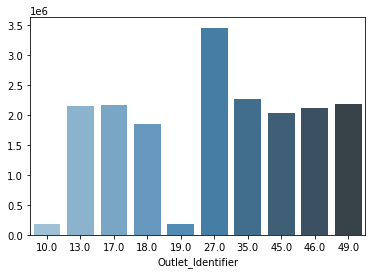

In [43]:
sns.barplot(total_sales_by_store.index, total_sales_by_store.values, palette = 'Blues_d');

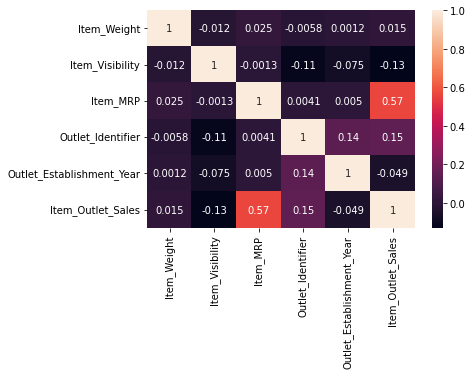

In [45]:
sns.heatmap(corr, annot = True)

#### **Pre Model**

In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,49.0,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,18.0,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,49.0,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10.0,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,13.0,1987,Large,Tier 3,Supermarket Type1,994.7052


In [49]:
item_avg_weight = df.groupby('Item_Type')['Item_Weight'].mean()
item_avg_weight

Item_Type
Baking Goods             12.336514
Breads                   11.557117
Breakfast                12.792492
Canned                   12.424120
Dairy                    13.365205
Frozen Foods             12.804303
Fruits and Vegetables    13.106129
Hard Drinks              11.575615
Health and Hygiene       12.986320
Household                13.282382
Meat                     12.800646
Others                   13.703437
Seafood                  12.337513
Snack Foods              12.914398
Soft Drinks              12.096596
Starchy Foods            13.715028
Name: Item_Weight, dtype: float64

In [81]:
item_avg_Sales = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
item_avg_Sales

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

##### **Item Sales Focus**

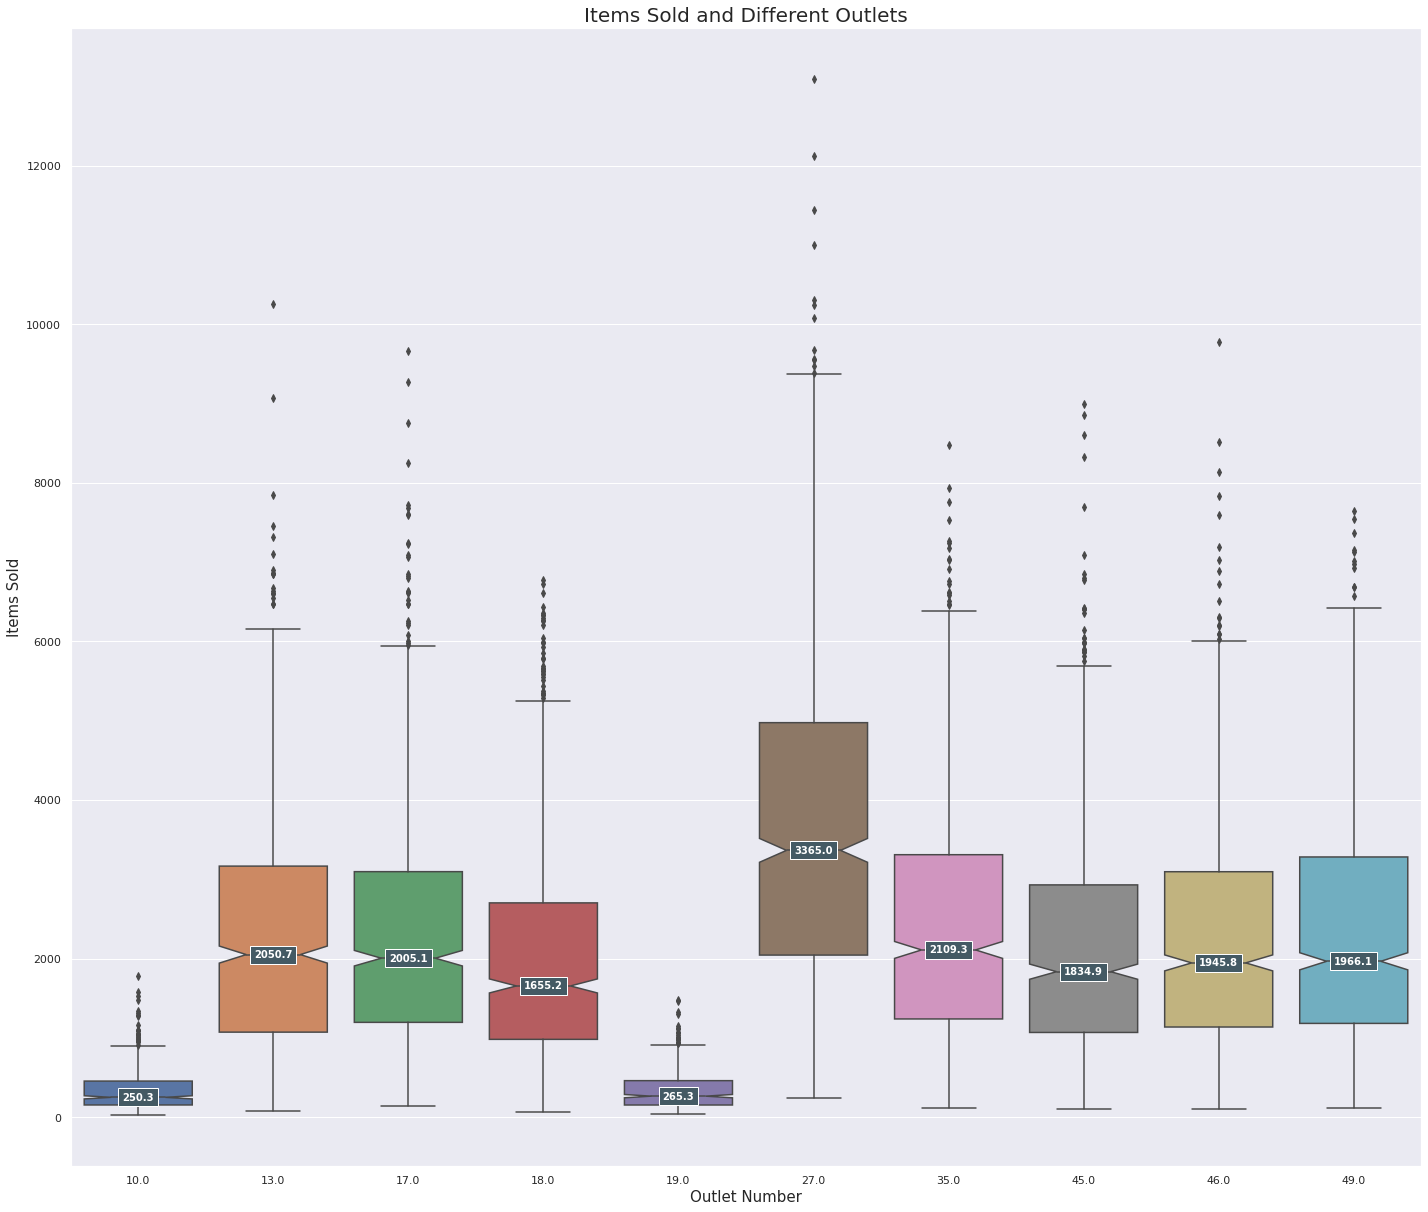

In [110]:
from seaborn.categorical import boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 17))
sns.set(style = 'darkgrid')

boxplot = sns.boxplot(data = df, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales',
            notch = True,
            );

ax = boxplot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for x in categories:
  y = round(lines[4+x*6].get_ydata()[0],1)

  ax.text(x,
          y,
          f'{y}',
          ha = 'center',
          va = 'center',
          fontweight = 'bold',
          size = 10,
          color = 'white',
          bbox = dict(facecolor = '#445A64'))

boxplot.set_xlabel('Outlet Number', fontsize = 15)
boxplot.set_ylabel('Items Sold', fontsize = 15)
boxplot.set_title('Items Sold and Different Outlets', fontsize = 20)
boxplot.figure.tight_layout()

* Why are outlet's 10, and 19 underperforming?
* What is causing Outlet 27 to have so much success
* With average sales ranging from 250 to 3300, what is the company's status quo?
* Are there certain items that are selling better in certain regions or particualr stores?

* mean label code assistance from: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value

In [150]:
visibility = df.groupby('Item_Type')['Item_Visibility'].mean()